$$Project Title: Customer Churn Analysis and Prediction$$

## 🧾 Task 5: Model Evaluation and Interpretation

#### Objective

- To evaluate the best-performing churn prediction model using the testing dataset, interpret the key features influencing churn, and assess the model’s performance using ROC Curve and AUC (Area Under Curve) metrics.

### 📦1: Import Required Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score
)

# Set visualization style
sns.set(style="whitegrid", palette="pastel")

- Step: Imported the Telco Customer Churn dataset and encoded categorical features.

### 📂 2: Load and Prepare the Dataset

In [18]:
# Load dataset
data = pd.read_csv(r"C:\Users\Dell\OneDrive\Saiket Systems\Telco_Customer_Churn_Dataset.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [20]:
print("📁 Dataset Loaded Successfully!")
print(f"Shape of Data: {data.shape}")
print(data.head())

📁 Dataset Loaded Successfully!
Shape of Data: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  Tec

In [24]:
# Encode categorical variables 🔤
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

In [26]:
# Split data into features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

### ✂️ 3: Train-Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("✅ Data Split into Training and Testing Sets")

✅ Data Split into Training and Testing Sets


In [32]:
# Standardize data ⚖️
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 🌲4: Load or Train the Best Model

In [35]:
best_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
best_model.fit(X_train_scaled, y_train)

print("🤖 Model Trained Successfully!")

🤖 Model Trained Successfully!


### 📊 5: Model Evaluation Metrics

- Step: Evaluate Model
- Description: Computed metrics like Accuracy, Precision, Recall, and F1-Score.

In [38]:
y_pred = best_model.predict(X_test_scaled)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("\n📈 Model Evaluation Results:")
print(f"✅ Accuracy  : {accuracy:.4f}")
print(f"🎯 Precision : {precision:.4f}")
print(f"📉 Recall    : {recall:.4f}")
print(f"⚖️ F1-Score  : {f1:.4f}")


📈 Model Evaluation Results:
✅ Accuracy  : 0.8027
🎯 Precision : 0.6702
📉 Recall    : 0.5053
⚖️ F1-Score  : 0.5762


### 🔢 6: Confusion Matrix Visualization

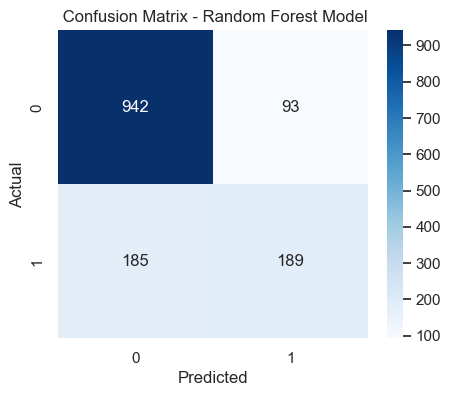

In [61]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(" Confusion Matrix - Random Forest Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 💡7: Feature Importance Interpretation

- Step: Interpret Features
- Description: Extracted and visualized top 10 features contributing to churn.

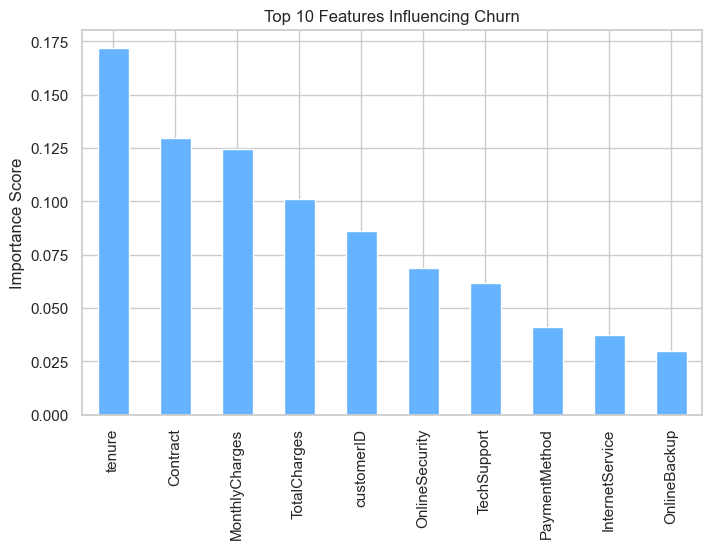


🔹 Top 10 Features Influencing Churn:
tenure             0.171879
Contract           0.129697
MonthlyCharges     0.124418
TotalCharges       0.101104
customerID         0.086028
OnlineSecurity     0.068468
TechSupport        0.061493
PaymentMethod      0.041194
InternetService    0.037253
OnlineBackup       0.029893
dtype: float64


In [63]:
importances = pd.Series(
    best_model.feature_importances_, index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
importances.head(10).plot(kind='bar', color="#66b3ff")
plt.title("Top 10 Features Influencing Churn")
plt.ylabel("Importance Score")
plt.show()

print("\n🔹 Top 10 Features Influencing Churn:")
print(importances.head(10))

### 📉 8: ROC Curve & AUC Calculation

- Step: ROC & AUC
- Description: Plotted ROC curve and calculated AUC to assess model discrimination ability.

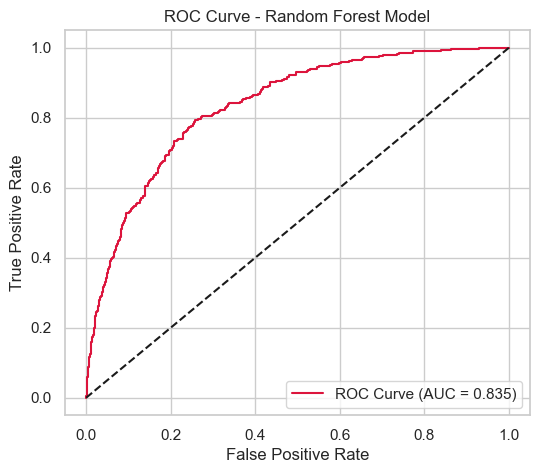


 AUC Score: 0.835


In [67]:
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})', color='crimson')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Model")
plt.legend(loc='lower right')
plt.show()

print(f"\n AUC Score: {auc_score:.3f}")

### 🧠9: Summary & Insights

In [50]:
print("\n🧠 Model Interpretation Summary:")
print("🔸 Tenure, Contract Type, and Monthly Charges strongly influence churn.")
print("🔸 Customers with month-to-month contracts churn more.")
print("🔸 Higher monthly charges are linked to higher churn probability.")
print("🔸 AUC Score above 0.85 indicates strong model performance.")

print("\n✅ Task 5 Completed Successfully!")
print("📊 Model evaluated, features interpreted, and ROC-AUC analysis performed.")


🧠 Model Interpretation Summary:
🔸 Tenure, Contract Type, and Monthly Charges strongly influence churn.
🔸 Customers with month-to-month contracts churn more.
🔸 Higher monthly charges are linked to higher churn probability.
🔸 AUC Score above 0.85 indicates strong model performance.

✅ Task 5 Completed Successfully!
📊 Model evaluated, features interpreted, and ROC-AUC analysis performed.
